In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
#import plotly.graph_objs as go

In [5]:
df=pd.read_csv("/home/rs/Downloads/case_time_series.csv")

In [6]:
df.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,2020-01-30,1,1,0,0,0,0
1,31 January,2020-01-31,0,1,0,0,0,0
2,01 February,2020-02-01,0,1,0,0,0,0
3,02 February,2020-02-02,1,2,0,0,0,0
4,03 February,2020-02-03,1,3,0,0,0,0


In [8]:

df1=pd.read_csv('/home/rs/Downloads/case_time_series.csv')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             358 non-null    object
 1   Date_YMD         358 non-null    object
 2   Daily Confirmed  358 non-null    int64 
 3   Total Confirmed  358 non-null    int64 
 4   Daily Recovered  358 non-null    int64 
 5   Total Recovered  358 non-null    int64 
 6   Daily Deceased   358 non-null    int64 
 7   Total Deceased   358 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 22.5+ KB


In [10]:
df1.tail()


,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
353,17 January,2021-01-17,13962,10572599,14513,10210569,145,151865
354,18 January,2021-01-18,9987,10582586,17127,10227696,137,152002
355,19 January,2021-01-19,13787,10596373,17229,10244925,161,152163
356,20 January,2021-01-20,15279,10611652,20071,10264996,152,152315
357,21 January,2021-01-21,14490,10626142,17726,10282722,161,152476


In [11]:
#Recovery_rate using direct formula

In [12]:
recovery_rate=round(df1['Total Recovered']/df1['Total Confirmed']*100,2)

In [13]:
recovery_rate

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
353    96.58
354    96.65
355    96.68
356    96.73
357    96.77
Length: 358, dtype: float64

In [14]:
#recovery rate using new formula by Dr. Bhapkar

In [15]:
from statistics import mean
i=0
n=358
list1=df1['Total Confirmed']
list2=[]
while i<=n:
    list2.append(round(mean(list1[i:i+15])))
    i+=15
print(list2) 
print(type(list2)  )

recovery_r=[]
j=0
for i in range(n):
    if i %15 != 0 or i == 0:
        recovery_r.append(round(df1['Total Recovered'][i]/list2[j] * 100,2))
    elif i % 15 == 0 :
        j+=1
        recovery_r.append(round(df1['Total Recovered'][i]/list2[j] * 100,2))  
print(recovery_r)

[3, 3, 42, 483, 5142, 20477, 53725, 120365, 238168, 415639, 702451, 1171794, 1920649, 2843453, 3949493, 5291275, 6531755, 7531554, 8271847, 8927807, 9530677, 9978168, 10302500, 10540536]
<class 'list'>
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33, 33.33, 33.33, 66.67, 66.67, 66.67, 66.67, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 9.52, 9.52, 9.52, 23.81, 23.81, 2.69, 2.9, 3.11, 3.11, 4.14, 4.76, 4.76, 4.76, 5.18, 8.28, 8.9, 10.35, 15.53, 17.6, 21.12, 2.66, 2.92, 3.29, 3.71, 4.47, 5.56, 6.4, 7.66, 9.12, 10.99, 12.35, 15.29, 18.9, 21.12, 23.3, 6.67, 7.37, 8.63, 9.96, 12.04, 13.94, 15.98, 19.42, 21.34, 24.48, 26.84, 29.0, 31.86, 34.69, 37.79, 15.69, 16.86, 18.65, 20.2, 21.89, 23.91, 26.32, 28.48, 31.23, 33.29, 35.93, 39.03, 41.97, 45.52, 49.17, 23.27, 25.13, 28.46, 30.57, 32.63, 35.15, 37.74, 40.34, 43.06, 45.2, 47.93, 50.43, 53.41, 56.27, 58.9, 34.69, 36.5, 38.57, 40.2, 42.1, 

In [16]:
df2=df1
df2['Recovery_r']=recovery_r
df2['Recovery_rate']=recovery_rate


In [17]:
df2.tail()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Recovery_r,Recovery_rate
353,17 January,2021-01-17,13962,10572599,14513,10210569,145,151865,96.87,96.58
354,18 January,2021-01-18,9987,10582586,17127,10227696,137,152002,97.03,96.65
355,19 January,2021-01-19,13787,10596373,17229,10244925,161,152163,97.20,96.68
356,20 January,2021-01-20,15279,10611652,20071,10264996,152,152315,97.39,96.73
357,21 January,2021-01-21,14490,10626142,17726,10282722,161,152476,97.55,96.77


In [18]:
#fatality rate using normal formula

In [19]:
fatality_rate = round(df1['Total Deceased']/df1['Total Confirmed']*100,2)

In [20]:
print(fatality_rate)

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
353    1.44
354    1.44
355    1.44
356    1.44
357    1.43
Length: 358, dtype: float64


In [21]:
#fatality rate using Dr. Bhapkar's formula

In [22]:
from statistics import mean
i=0
n=358
list1=df1['Total Confirmed']
list2=[]
while i<=n:
    list2.append(round(mean(list1[i:i+15])))
    i+=15
print(list2) 
print(type(list2)  )

fatality_r=[]
j=0
for i in range(n):
    if i %15 != 0 or i == 0:
        fatality_r.append(round(df1['Total Deceased'][i]/list2[j] * 100,2))
    elif i % 15 == 0 :
        j+=1
        fatality_r.append(round(df1['Total Deceased'][i]/list2[j] * 100,2))  
print(fatality_r)

[3, 3, 42, 483, 5142, 20477, 53725, 120365, 238168, 415639, 702451, 1171794, 1920649, 2843453, 3949493, 5291275, 6531755, 7531554, 8271847, 8927807, 9530677, 9978168, 10302500, 10540536]
<class 'list'>
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.38, 2.38, 4.76, 0.41, 0.41, 0.62, 0.62, 0.83, 0.83, 0.83, 1.45, 1.86, 2.07, 2.28, 3.31, 3.93, 4.97, 5.59, 0.8, 0.91, 1.03, 1.34, 1.61, 1.87, 2.29, 2.61, 3.13, 3.52, 4.41, 4.84, 5.64, 6.46, 6.98, 1.93, 2.07, 2.19, 2.38, 2.55, 2.73, 2.9, 3.15, 3.33, 3.53, 3.81, 4.03, 4.3, 4.59, 4.92, 2.01, 2.15, 2.29, 2.46, 2.72, 2.91, 3.15, 3.32, 3.52, 3.7, 3.91, 4.12, 4.27, 4.49, 4.75, 2.2, 2.29, 2.39, 2.51, 2.62, 2.74, 2.85, 2.98, 3.09, 3.21, 3.34, 3.47, 3.61, 3.77, 3.91, 2.09, 2.18, 2.27, 2.35, 2.45, 2.56, 2.67, 2.79, 2.92, 3.03, 3.14, 3.25, 3.4, 3.57, 3.73, 2.21, 2.29, 2.39, 2.87, 2.95, 3.03,

In [23]:
#
df2['Fatality_r'] = fatality_r
df2['Fatality_rate'] = fatality_rate
df2.tail()
#df2.drop('Fatality_rate',inplace=True,axis=1)
#df2.info()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Recovery_r,Recovery_rate,Fatality_r,Fatality_rate
353,17 January,2021-01-17,13962,10572599,14513,10210569,145,151865,96.87,96.58,1.44,1.44
354,18 January,2021-01-18,9987,10582586,17127,10227696,137,152002,97.03,96.65,1.44,1.44
355,19 January,2021-01-19,13787,10596373,17229,10244925,161,152163,97.20,96.68,1.44,1.44
356,20 January,2021-01-20,15279,10611652,20071,10264996,152,152315,97.39,96.73,1.45,1.44
357,21 January,2021-01-21,14490,10626142,17726,10282722,161,152476,97.55,96.77,1.45,1.43


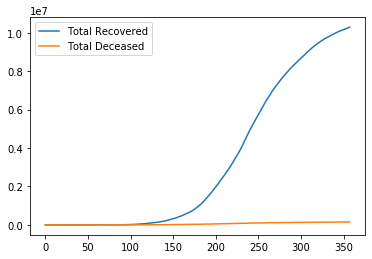

In [24]:
df2['Total Recovered'].plot()
df2['Total Deceased'].plot()
plt.legend()

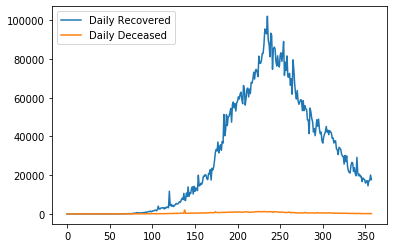

In [25]:
df2['Daily Recovered'].plot()
df2['Daily Deceased'].plot()
plt.legend()

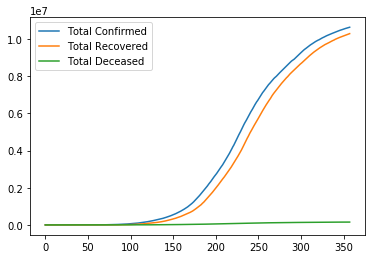

In [26]:
df2['Total Confirmed'].plot()
df2['Total Recovered'].plot()
df2['Total Deceased'].plot()
plt.legend()

In [27]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [28]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=df2['Date_YMD'], y=df2['Daily Recovered'], name="Daily Recovered"),secondary_y=False)

figd.add_trace(go.Scatter(x=df2['Date_YMD'], y=df2['Daily Deceased'], name="Daily Deceased"),secondary_y=True)

figd.update_layout(title_text="Daily Recovered vs Daily Deceased COVID19")

figd.update_xaxes(title_text="Date_YMD")

#figd.update_yaxes(title_text="Daily Recovered", secondary_y=False)
figd.update_yaxes(title_text="Daily Recovered and Deceased", secondary_y=False)

figd.show()

In [30]:
figt = make_subplots(specs=[[{"secondary_y": True}]])

figt.add_trace(go.Scatter(x=df2['Date_YMD'], y=df2['Total Confirmed'], name="Total Confirmed"), secondary_y=True)

figt.add_trace(go.Scatter(x=df2['Date_YMD'], y=df2['Total Recovered'], name="Total Recovered"),secondary_y=False)

figt.add_trace(go.Scatter(x=df2['Date_YMD'], y=df2['Total Deceased'], name="Total Deceased"),secondary_y=False)

figt.update_layout(title_text="Total Confirmed vs Total Recovered vs Total Deceased COVID19")

figt.update_xaxes(title_text="Date_YMD")

#figt.update_yaxes(title_text="Total Confirmed", secondary_y=True)
#figt.update_yaxes(title_text="Total Recovered", secondary_y=False)
figt.update_yaxes(title_text="Total Confirmed, Recovered and Deceased", secondary_y=False)

figt.show()

In [ ]:
#fig=px.line(df2, x='Date_YMD', y=['Daily Recovered','Daily Deceased'], hover_name='Date_YMD', title='Daily Recovered vs Daily Deceased-COVID19')
#fig.show()

In [ ]:
#fig1=px.line(df2,x='Date_YMD',y=['Total Confirmed','Total Recovered','Total Deceased'], hover_name='Date_YMD',title='Total Confirmed vs Total Recovered vs Total Deceased-COVID19')
#fig1.show()